In [1]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver, plot_1d_slice, plot_timeseries
from superfv.initial_conditions import square

In [2]:
N = 64

sim1 = AdvectionSolver(
    ic=partial(square, vx=2, vy=1),
    nx=N,
    ny=N,
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter="minmod",
)

sim2 = AdvectionSolver(
    ic=partial(square, vx=2, vy=1),
    nx=N,
    ny=N,
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter="moncen",
)

sim3 = AdvectionSolver(
    ic=partial(square, vx=2, vy=1),
    nx=N,
    ny=N,
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter="PP2D",
)

sims = {"MH-(minmod)": sim1, "MH-(moncen)": sim2, "MH-(PP2D)": sim3}

In [3]:
for sim in sims.values():
    sim.musclhancock(1.0, allow_overshoot=True)

Step #241 @ t=1.00e+00 | dt=4.17e-03 | (done)                                                       
Step #241 @ t=1.00e+00 | dt=4.17e-03 | (done)                                                       
Step #241 @ t=1.00e+00 | dt=4.17e-03 | (done)                                                       


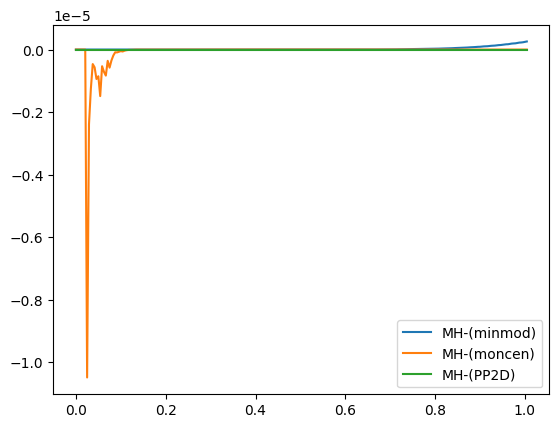

In [4]:
fig, ax = plt.subplots()

for name, sim in sims.items():
    plot_timeseries(sim, ax, "min_rho", label=name)

ax.legend()

In [5]:
for name, sim in sims.items():
    min_rho = np.min(sim.minisnapshots["min_rho"])
    print(f"{name}: {min_rho=}")

MH-(minmod): min_rho=np.float64(0.0)
MH-(moncen): min_rho=np.float64(-1.0479692776733463e-05)
MH-(PP2D): min_rho=np.float64(-1.6857549087723833e-20)


/Users/jonathan/Desktop/superfv/superfv/visualization.py:38: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:38: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:38: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.492188
  warnings.warn(


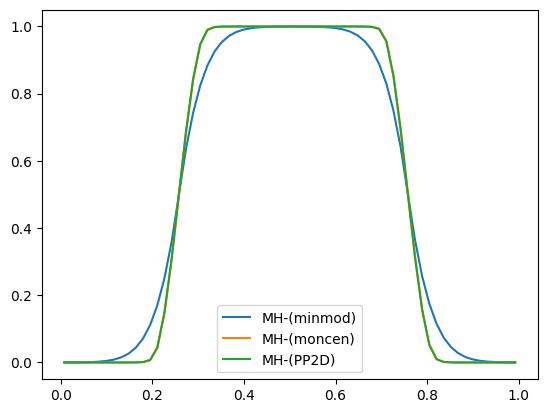

In [6]:
fig, ax = plt.subplots()

for name, sim in sims.items():
    plot_1d_slice(sim, ax, "rho", y=0.5, cell_averaged=True, label=name)

ax.legend()